In [2]:
import pandas as pd
import math
import numpy as np


def remove_last_text(text):
    result = ""
    if type(text) == str:
        list_char = text.split(" ")
        list_char.pop()
        result = " ".join(list_char)
    elif type(text) == float:
        result = math.nan
    return result


def list_value_field(field):
    return list(dict.fromkeys(df[field].values.tolist()))


def getConvertterNum(field, key):
    value = ""
    if isinstance(field, (int, float)):
        if math.isnan(field):
            value = "NaN"
        else:
            return field
    elif isinstance(field, (str)):
        if field.isnumeric() and field != "NaN":
            return float(field)
        else:
            value = field.lower()
    return convertter[key][value]
    # return type(value);


convertter = {
    "Funiture": {
        "nội thất đầy đủ": 4,
        "nội thất cao cấp": 5,
        "nhà trống": 0,
        "bàn giao thô": 2,
        "NaN": 0,
    },
    "Paper": {"đã có sổ": 3, "đang chờ sổ": 2, "giấy tờ khác": 1, "nan": 0, "NaN": 0},
    "Type": {
        "nhà biệt thự": 3,
        "nhà phố liền kề": 2,
        "nhà mặt phố, mặt tiền": 4,
        "nhà ngõ, hẻm": 1,
        "NaN": 1,
    },
    "Bathroom": {"nhiều hơn 6": 7, "NaN": 1},
    "Bedroom": {
        "NaN": 1,
        "nhiều hơn 10": 11,
    },
    "MainDirection": {
        "NaN": 0,
        "đông nam": 1,
        "nam": 2,
        "bắc": 3,
        "tây bắc": 4,
        "tây": 5,
        "đông": 6,
        "đông bắc": 7,
        "tây nam": 8,
    },
    "Floor": {"NaN": 1},
    "Charistic": {"hẻm xe hơi": 1, "NaN": 0},
}

In [3]:
# Đọc dữ liệu
df_list = []

for i in range(101):
    df_list.append(pd.read_csv(f"./data_2/data_2/ha_noi/page_nha_dat_ha-noi_{i}.csv"))


df = pd.concat(df_list, ignore_index=True)
    
# Quy chuẩn lại tên cột

df.columns = [
    "Area",  # Diện tích đất
    "Bedroom",  # Phòng ngủ
    "Bathroom",  # Phòng vệ sinh
    "Paper",  # Các loại giấy tờ pháp lý
    "Type",  # Loại hình nhà ở
    "Width",  # Chiều rộng
    "UseageArea",  # Diện tích sử dụng
    "Price/m2",  # Giá 1m2
    "MainDirection",  # Hướng của chính
    "Floor",  # Tổng số tầng
    "Charistic",  # Đặc điểm nhà đất
    "Furniture",  # Tình hình nội thất
    "Length",  # Chiều dài
    "Location",  # Vị trí địa lý
    "Name",
    "Url",
    "District",
    "Price",
]

# df["đ/m²" in df["Price/m2"]]

C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\2506713954.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


In [4]:
df = df.drop_duplicates()

df[df["Price/m2"].isnull()]

,Area,Bedroom,Bathroom,Paper,Type,Width,UseageArea,Price/m2,MainDirection,Floor,Charistic,Furniture,Length,Location,Name,Url,District,Price
1588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ha-noi,"Bán nhà ngõ 296 Lĩnh Nam: 27m2, 2 tầng, giá ch...",NaN,"296 Lĩnh Nam, Phường Lĩnh Nam, Quận Hoàng Mai,...","1,89 tỷ - 27 m2"
3366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ha-noi,Bán Gấp Nhà Hồ Tùng Mậu 60m2 - Hơn 10tỷ - Lô G...,NaN,"Đường Hồ Tùng Mậu, Phường Phú Diễn, Quận Bắc T...","10,9 tỷ - 60 m2"
3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ha-noi,Nhà độc lập 40m2 xây dựng 3 tầng giá chỉ 1.85 ...,NaN,"Đại Thành , Đông La, Phường Yên Nghĩa, Quận Hà...","1,85 tỷ - 40 m2"
3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ha-noi,Ở NGAY! Nhà dân xây Xuân Phương 59m chỉ 4.x tỷ...,NaN,"Đường Phương Canh, Phường Phương Canh, Quận Na...","4,79 tỷ - 59 m2"


In [5]:
df = df[~(df["Price/m2"].isnull())]

In [6]:
df.head()

,Area,Bedroom,Bathroom,Paper,Type,Width,UseageArea,Price/m2,MainDirection,Floor,Charistic,Furniture,Length,Location,Name,Url,District,Price
0,55 m²,10 phòng,NaN,Đã có sổ,"Nhà ngõ, hẻm",4 m,NaN,"154,55 triệu/m²",NaN,5.0,NaN,Nội thất đầy đủ,NaN,ha-noi,Nhà Dòng tiền Trung Kính Cầu Giấy 10 phòng fun...,NaN,"Trung kính, Phường Trung Hoà, Quận Cầu Giấy, H...","8,5 tỷ - 55 m2"
1,38 m²,3 phòng,NaN,Đã có sổ,Nhà phố liền kề,NaN,180 m²,"142,11 triệu/m²",NaN,5.0,NaN,Nội thất cao cấp,NaN,ha-noi,"Nhà LK khu La Khê, phân lô, gara ô tô, 38m2x5T...",NaN,"Đường Lê Trọng Tấn, Phường La Khê, Quận Hà Đôn...","5,4 tỷ - 38 m2"
2,42 m²,1 phòng,1 phòng,NaN,"Nhà ngõ, hẻm",NaN,42 m²,"55,95 triệu/m²",NaN,1.0,Hẻm xe hơi,NaN,NaN,ha-noi,"+ Bán Nhà Phú Viên, Lâm Du, Phường Bồ Đề, Quậ...",NaN,"Phố Phú Viên, Phường Bồ Đề, Quận Long Biên, Hà...","2,35 tỷ - 42 m2"
3,65 m²,4 phòng,4 phòng,Đã có sổ,"Nhà ngõ, hẻm",NaN,NaN,"184,62 triệu/m²",NaN,5.0,NaN,Nội thất cao cấp,NaN,ha-noi,Phân lô Hoàng Quốc Việt 65m2- 5T Thang máy- Ga...,NaN,"Hoàng Quốc Việt, Phường Nghĩa Đô, Quận Cầu Giấ...",12 tỷ - 65 m2
4,36 m²,4 phòng,NaN,Đã có sổ,"Nhà ngõ, hẻm",4.5 m,NaN,"111,11 triệu/m²",NaN,6.0,NaN,Nội thất đầy đủ,NaN,ha-noi,Cổ Nhuế Phạm Văn Đồng 36m2- 6T Thang máy- Cách...,NaN,"Đường Phạm Văn Đồng, Phường Cổ Nhuế 1, Quận Bắ...",4 tỷ - 36 m2


In [7]:
list_value_field("Price")

['8,5 tỷ - 55 m2',
 '5,4 tỷ - 38 m2',
 '2,35 tỷ - 42 m2',
 '12 tỷ - 65 m2',
 '4 tỷ - 36 m2',
 '5,95 tỷ - 50 m2',
 '4,5 tỷ - 38 m2',
 '9,9 tỷ - 50 m2',
 '10,9 tỷ - 50 m2',
 '5,95 tỷ - 48 m2',
 '3,555555555 tỷ - 35 m2',
 '7,85 tỷ - 70 m2',
 '2,25 tỷ - 60 m2',
 '16,7 tỷ - 86 m2',
 '23,8 tỷ - 102 m2',
 '2,55 tỷ - 32 m2',
 '2,8 tỷ - 31 m2',
 '5,5 tỷ - 38 m2',
 '7,15 tỷ - 55 m2',
 '12,8 tỷ - 92.5 m2',
 '43 tỷ - 210 m2',
 '16,5 tỷ - 80 m2',
 '8,6 tỷ - 50 m2',
 '9,5 tỷ - 48 m2',
 '16,5 tỷ - 50 m2',
 '9,6 tỷ - 45 m2',
 '4,3 tỷ - 40 m2',
 '3,5 tỷ - 27 m2',
 '4,25 tỷ - 43 m2',
 '11 tỷ - 48 m2',
 '7,2 tỷ - 54 m2',
 '8,69 tỷ - 47 m2',
 '8,98 tỷ - 59 m2',
 '4,85 tỷ - 30 m2',
 '3,25 tỷ - 38 m2',
 '2,05 tỷ - 15 m2',
 '4,05 tỷ - 35 m2',
 '24,6 tỷ - 140 m2',
 '16,8 tỷ - 100 m2',
 '9,4 tỷ - 68 m2',
 '3,75 tỷ - 42 m2',
 '5,6 tỷ - 35 m2',
 '3,8 tỷ - 48 m2',
 '4,35 tỷ - 39 m2',
 '5,2 tỷ - 45 m2',
 '4,58 tỷ - 34 m2',
 '5,3 tỷ - 50 m2',
 '2,65 tỷ - 33 m2',
 '6,65 tỷ - 39 m2',
 '4,8 tỷ - 60 m2',
 '2,1 tỷ - 92.

In [8]:
list_value_field("Price/m2")

['154,55 triệu/m²',
 '142,11 triệu/m²',
 '55,95 triệu/m²',
 '184,62 triệu/m²',
 '111,11 triệu/m²',
 '119 triệu/m²',
 '118,42 triệu/m²',
 '198 triệu/m²',
 '218 triệu/m²',
 '123,96 triệu/m²',
 '101,59 triệu/m²',
 '112,14 triệu/m²',
 '37,5 triệu/m²',
 '194,19 triệu/m²',
 '233,33 triệu/m²',
 '79,69 triệu/m²',
 '90,32 triệu/m²',
 '144,74 triệu/m²',
 '130 triệu/m²',
 '138,38 triệu/m²',
 '204,76 triệu/m²',
 '206,25 triệu/m²',
 '172 triệu/m²',
 '197,92 triệu/m²',
 '330 triệu/m²',
 '213,33 triệu/m²',
 '107,5 triệu/m²',
 '129,63 triệu/m²',
 '98,84 triệu/m²',
 '229,17 triệu/m²',
 '133,33 triệu/m²',
 '184,89 triệu/m²',
 '152,2 triệu/m²',
 '161,67 triệu/m²',
 '85,53 triệu/m²',
 '136,67 triệu/m²',
 '115,71 triệu/m²',
 '175,71 triệu/m²',
 '168 triệu/m²',
 '138,24 triệu/m²',
 '89,29 triệu/m²',
 '160 triệu/m²',
 '79,17 triệu/m²',
 '111,54 triệu/m²',
 '115,56 triệu/m²',
 '134,71 triệu/m²',
 '106 triệu/m²',
 '80,3 triệu/m²',
 '170,51 triệu/m²',
 '80 triệu/m²',
 '22,65 triệu/m²',
 '113,33 triệu/m²',
 '66 

In [9]:
df.drop(
    columns=[
        "Name",  # khong quan trong
        "Url",  # khong lien quan
        "Price",  # ko su dung vi su dung price/m2
    ],
    inplace=True,
)


df.isna().sum()

Area                0
Bedroom             0
Bathroom         3098
Paper            1746
Type               91
Width            7489
UseageArea       7705
Price/m2            0
MainDirection    7620
Floor            2082
Charistic        8208
Furniture        4297
Length           8526
Location            0
District            0
dtype: int64

In [10]:
df.drop(
    columns=[
        "Length",
        "Charistic",
        "MainDirection",
        "UseageArea",
        "Width",
        "Location",
        "Furniture",
    ],
    inplace=True,
)

In [11]:
df.count()

Area        8774
Bedroom     8774
Bathroom    5676
Paper       7028
Type        8683
Price/m2    8774
Floor       6692
District    8774
dtype: int64

In [12]:
list_value_field("Bedroom")

['10 phòng',
 '3 phòng',
 '1 phòng',
 '4 phòng',
 '5 phòng',
 '6 phòng',
 '9 phòng',
 '2 phòng',
 'nhiều hơn 10 phòng',
 '8 phòng',
 '7 phòng']

In [13]:
# Xử lý dữ liệu phòng ngủ
df["Bedroom"] = (
    df["Bedroom"]
    .apply(remove_last_text)
    .apply(getConvertterNum, args=("Bedroom",))
    .apply(lambda x: float(x))
)

list_value_field("Bedroom")


[10.0, 3.0, 1.0, 4.0, 5.0, 6.0, 9.0, 2.0, 11.0, 8.0, 7.0]

In [14]:
list_value_field("Price/m2")

['154,55 triệu/m²',
 '142,11 triệu/m²',
 '55,95 triệu/m²',
 '184,62 triệu/m²',
 '111,11 triệu/m²',
 '119 triệu/m²',
 '118,42 triệu/m²',
 '198 triệu/m²',
 '218 triệu/m²',
 '123,96 triệu/m²',
 '101,59 triệu/m²',
 '112,14 triệu/m²',
 '37,5 triệu/m²',
 '194,19 triệu/m²',
 '233,33 triệu/m²',
 '79,69 triệu/m²',
 '90,32 triệu/m²',
 '144,74 triệu/m²',
 '130 triệu/m²',
 '138,38 triệu/m²',
 '204,76 triệu/m²',
 '206,25 triệu/m²',
 '172 triệu/m²',
 '197,92 triệu/m²',
 '330 triệu/m²',
 '213,33 triệu/m²',
 '107,5 triệu/m²',
 '129,63 triệu/m²',
 '98,84 triệu/m²',
 '229,17 triệu/m²',
 '133,33 triệu/m²',
 '184,89 triệu/m²',
 '152,2 triệu/m²',
 '161,67 triệu/m²',
 '85,53 triệu/m²',
 '136,67 triệu/m²',
 '115,71 triệu/m²',
 '175,71 triệu/m²',
 '168 triệu/m²',
 '138,24 triệu/m²',
 '89,29 triệu/m²',
 '160 triệu/m²',
 '79,17 triệu/m²',
 '111,54 triệu/m²',
 '115,56 triệu/m²',
 '134,71 triệu/m²',
 '106 triệu/m²',
 '80,3 triệu/m²',
 '170,51 triệu/m²',
 '80 triệu/m²',
 '22,65 triệu/m²',
 '113,33 triệu/m²',
 '66 

In [15]:
# Xử lý phần giá cả

def convert_price(price):
    list_char = price.split(" ")
    base = list_char.pop()
    result = " ".join(list_char)
    result = float(result.replace(",", "."))
    if base == "tỷ/m²":
        result = result * 1000
    return result


invalid_price = df["Price/m2"].str.contains("đ/m²")

filtered_df = df[~invalid_price]

df["Price/m2"] = filtered_df["Price/m2"].apply(convert_price).apply(lambda x: x * 1000)

list_value_field("Price/m2")
# df.sort_values(by=["Price/m2"])

[154550.0,
 142110.0,
 55950.0,
 184620.0,
 111110.0,
 119000.0,
 118420.0,
 198000.0,
 218000.0,
 123960.0,
 101590.0,
 112140.0,
 37500.0,
 194190.0,
 233330.0,
 79690.0,
 90320.0,
 144740.0,
 130000.0,
 138380.0,
 204760.0,
 206250.0,
 172000.0,
 197920.0,
 330000.0,
 213330.0,
 107500.0,
 129630.0,
 98840.0,
 229170.0,
 133330.0,
 184890.0,
 152200.0,
 161670.0,
 85530.0,
 136670.0,
 115710.0,
 175710.0,
 168000.0,
 138240.0,
 89290.0,
 160000.0,
 79170.0,
 111540.0,
 115560.0,
 134710.0,
 106000.0,
 80300.0,
 170510.0,
 80000.0,
 22650.0,
 113330.0,
 66000.0,
 106250.0,
 115000.0,
 175000.0,
 120000.0,
 83330.0,
 131670.0,
 103330.0,
 139060.0,
 77940.0,
 53440.0,
 110590.0,
 100000.0,
 62500.0,
 283330.0,
 106820.0,
 140630.0,
 136840.0,
 113570.0,
 71430.0,
 142350.0,
 126670.0,
 122220.0,
 188000.0,
 93440.0,
 161900.0,
 105000.0,
 58330.0,
 92500.0,
 43330.0,
 127420.0,
 345450.0,
 255560.0,
 90000.0,
 154000.0,
 109520.0,
 38750.0,
 192620.0,
 128889.99999999999,
 182860.0,
 

In [16]:
# Xử lý phần diện tích

df["Area"] = df["Area"].apply(remove_last_text).apply(lambda x: float(x))

list_value_field("Area")

[55.0,
 38.0,
 42.0,
 65.0,
 36.0,
 50.0,
 48.0,
 35.0,
 70.0,
 60.0,
 86.0,
 102.0,
 32.0,
 31.0,
 92.5,
 210.0,
 80.0,
 45.0,
 40.0,
 27.0,
 43.0,
 54.0,
 47.0,
 59.0,
 30.0,
 15.0,
 140.0,
 100.0,
 68.0,
 39.0,
 34.0,
 33.0,
 92.6998,
 20.0,
 17.0,
 22.0,
 16.0,
 14.0,
 63.0,
 30.5,
 75.0,
 44.7999,
 24.0,
 646.5,
 350.0,
 64.0,
 89.0,
 61.0,
 19.0,
 46.0,
 44.0,
 23.0,
 51.0,
 56.0,
 36.5998,
 90.0,
 71.0,
 62.0,
 35.5,
 52.0,
 21.0,
 41.0,
 25.0,
 91.0,
 37.0,
 18.0,
 120.0,
 110.0,
 58.0,
 28.0,
 44.5,
 76.0,
 35.1,
 78.0,
 49.0,
 105.0,
 77.0,
 266.0,
 92.0,
 131.0,
 74.0,
 142.0,
 180.0,
 307.0,
 53.0,
 69.0,
 103.0,
 126.0,
 72.0,
 107.0,
 190.0,
 66.0,
 84.0,
 39.0998,
 225.0,
 49.0998,
 12.0,
 128.0,
 10.0,
 127.0,
 57.0,
 64.8,
 49.5,
 99.0,
 68.6997,
 87.0,
 26.0,
 82.0,
 32.0998,
 65.6999,
 40.7,
 29.0,
 67.0,
 144.0,
 85.0,
 93.0,
 230.0,
 40.5,
 130.0,
 98.0,
 82.5,
 38.5,
 101.0,
 108.0,
 83.0,
 41.2,
 320.0,
 48.9,
 280.0,
 13.0,
 820.0,
 195.0,
 135.0,
 150.0,
 66.3,

In [17]:
list_value_field("Paper")


['Đã có sổ', nan, 'Giấy tờ khác', 'Đang chờ sổ']

In [18]:
# Xử ly phần giấy tờ nhà
df["Paper"] = df["Paper"].apply(getConvertterNum, args=("Paper",)).apply(lambda x: float(x))

In [19]:
list_value_field("Type")

['Nhà ngõ, hẻm',
 'Nhà phố liền kề',
 nan,
 'Nhà mặt phố, mặt tiền',
 'Nhà biệt thự']

In [20]:
df["Type"] = df["Type"].apply(getConvertterNum, args=("Type",)).apply(lambda x: float(x))

In [21]:
list_value_field("Type")

[1.0, 2.0, 4.0, 3.0]

In [22]:
# Xử lý phần số tầng
def remove_type_specific(type):
    if isinstance(type, (str)):
        real_type = type.split(",", 1)[0]
        return real_type
    return type


df["Floor"] = (
    df["Floor"].apply(remove_type_specific).apply(getConvertterNum, args=("Floor",))
)


In [23]:
list_value_field("Floor")

[5.0,
 1.0,
 6.0,
 7.0,
 4.0,
 3.0,
 2.0,
 66.0,
 10.0,
 8.0,
 9.0,
 25.0,
 55.0,
 44.0,
 77.0,
 27.0,
 22.0,
 11.0,
 33.0,
 88.0,
 532.0,
 24.0,
 86.0,
 34.0,
 45.0,
 99.0,
 35.0,
 17.0]

In [24]:
df = df[~(df["Floor"]>8)]

In [25]:
list_value_field("Bathroom")

[nan,
 '1 phòng',
 '4 phòng',
 '3 phòng',
 '5 phòng',
 'Nhiều hơn 6 phòng',
 '2 phòng',
 '6 phòng']

In [26]:
# Xử lý phần phòng tắm
df["Bathroom"] = df["Bathroom"].apply(remove_last_text).apply(getConvertterNum, args=("Bathroom",))

In [27]:
list_value_field("Bathroom")

[1.0, 4.0, 3.0, 5.0, 7.0, 2.0, 6.0]

In [28]:
# Xử lý phần quận huyện
def get_district(location):
    temp_locaion = location.split(",")
    temp_locaion.pop()
    return temp_locaion.pop()


df["District"] = df["District"].apply(lambda x: x.replace("Xem bản đồ", "")).apply(get_district)

list_value_field("District")

[' Quận Cầu Giấy',
 ' Quận Hà Đông',
 ' Quận Long Biên',
 ' Quận Bắc Từ Liêm',
 ' Quận Nam Từ Liêm',
 ' Quận Ba Đình',
 ' Quận Đống Đa',
 ' Quận Tây Hồ',
 ' Huyện Thanh Trì',
 ' Quận Hai Bà Trưng',
 ' Quận Thanh Xuân',
 ' Quận Hoàng Mai',
 ' Huyện Quốc Oai',
 ' Quận Hoàn Kiếm',
 ' Huyện Ba Vì',
 ' Huyện Gia Lâm',
 ' Huyện Hoài Đức',
 ' Huyện Mê Linh',
 ' Huyện Đông Anh',
 ' Huyện Thanh Oai',
 ' Huyện Chương Mỹ',
 ' Huyện Thường Tín',
 ' Thị xã Sơn Tây',
 ' Huyện Đan Phượng',
 ' Huyện Thạch Thất',
 ' Huyện Sóc Sơn']

<Axes: xlabel='Price/m2', ylabel='District'>

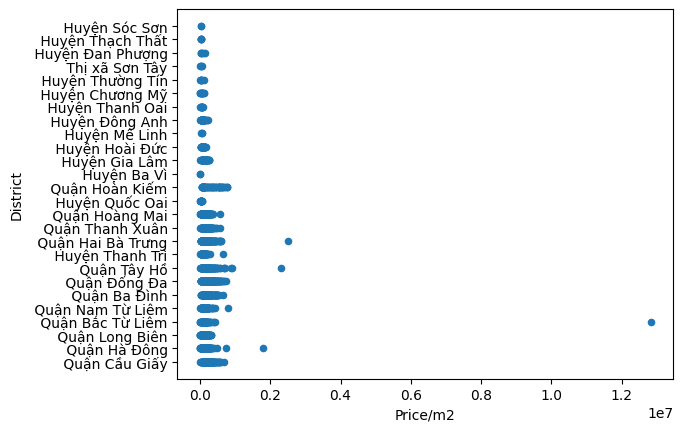

In [29]:
df.plot(kind="scatter", x="Price/m2", y="District")

In [30]:
df = df[~(df["Price/m2"]> 0.15 * 1e7)]

<Axes: xlabel='Price/m2', ylabel='District'>

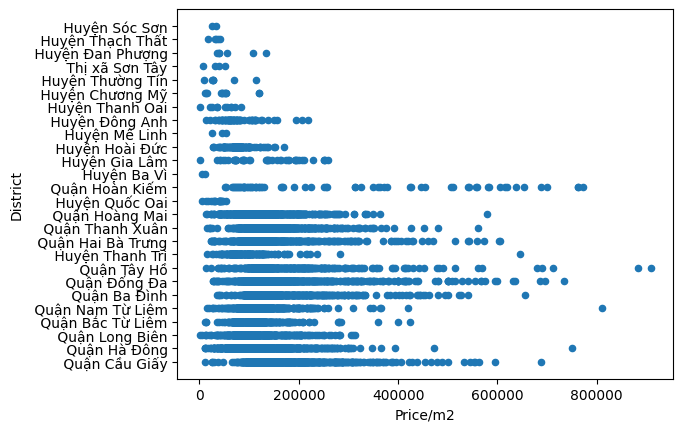

In [31]:
df.plot(kind="scatter", x="Price/m2", y="District")

In [32]:
df = df[~(df["Price/m2"] > 800000)]

<Axes: xlabel='Price/m2', ylabel='District'>

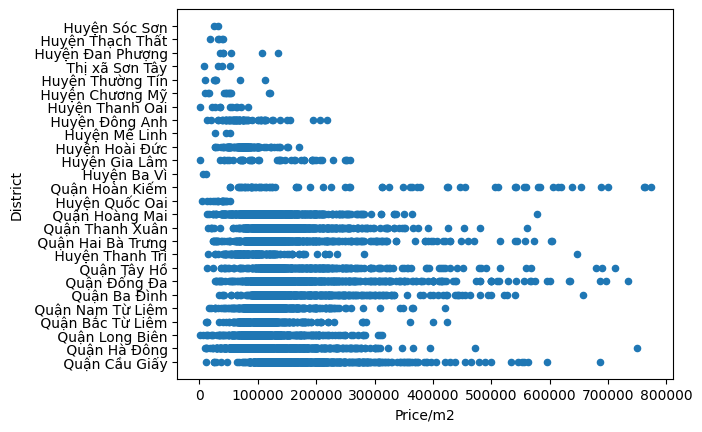

In [33]:
df.plot(kind="scatter", x="Price/m2", y="District")

In [34]:
list_value_field("Floor")

[5.0, 1.0, 6.0, 7.0, 4.0, 3.0, 2.0, 8.0]

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["District"] = label_encoder.fit_transform(df["District"])

In [36]:
df[df["Price/m2"].isna()].count()

Area        5
Bedroom     5
Bathroom    5
Paper       5
Type        5
Price/m2    0
Floor       5
District    5
dtype: int64

In [37]:
# df = df[~df["Price/m2"].isna()]

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [39]:
import plotly.express as px
import plotly.graph_objects as go

# figure = px.bar(
#     df,
#     x=df["District"],
#     y=df["Area"],
#     color=df["Price/m2"],
#     title="Rent in Different Cities According to Area Type",
#     range_y=(4000, 10000)
# )
# figure.show()

# sns.displot(df["Price/m2"], bin(20))

df.columns


Index(['Area', 'Bedroom', 'Bathroom', 'Paper', 'Type', 'Price/m2', 'Floor',
       'District'],
      dtype='object')

In [40]:
# df.sort_values(by=["Price/m2"]).tail()

list_value_field("Floor")

# df.dropna(subset=["Price/m2"], inplace=True)

[5.0, 1.0, 6.0, 7.0, 4.0, 3.0, 2.0, 8.0]

In [41]:
# plt.figure(figsize=(16, 5))

# sns.heatmap(df.corr(), annot=True)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Bedroom'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Type'}>],
       [<Axes: title={'center': 'Price/m2'}>,
        <Axes: title={'center': 'Floor'}>]], dtype=object)

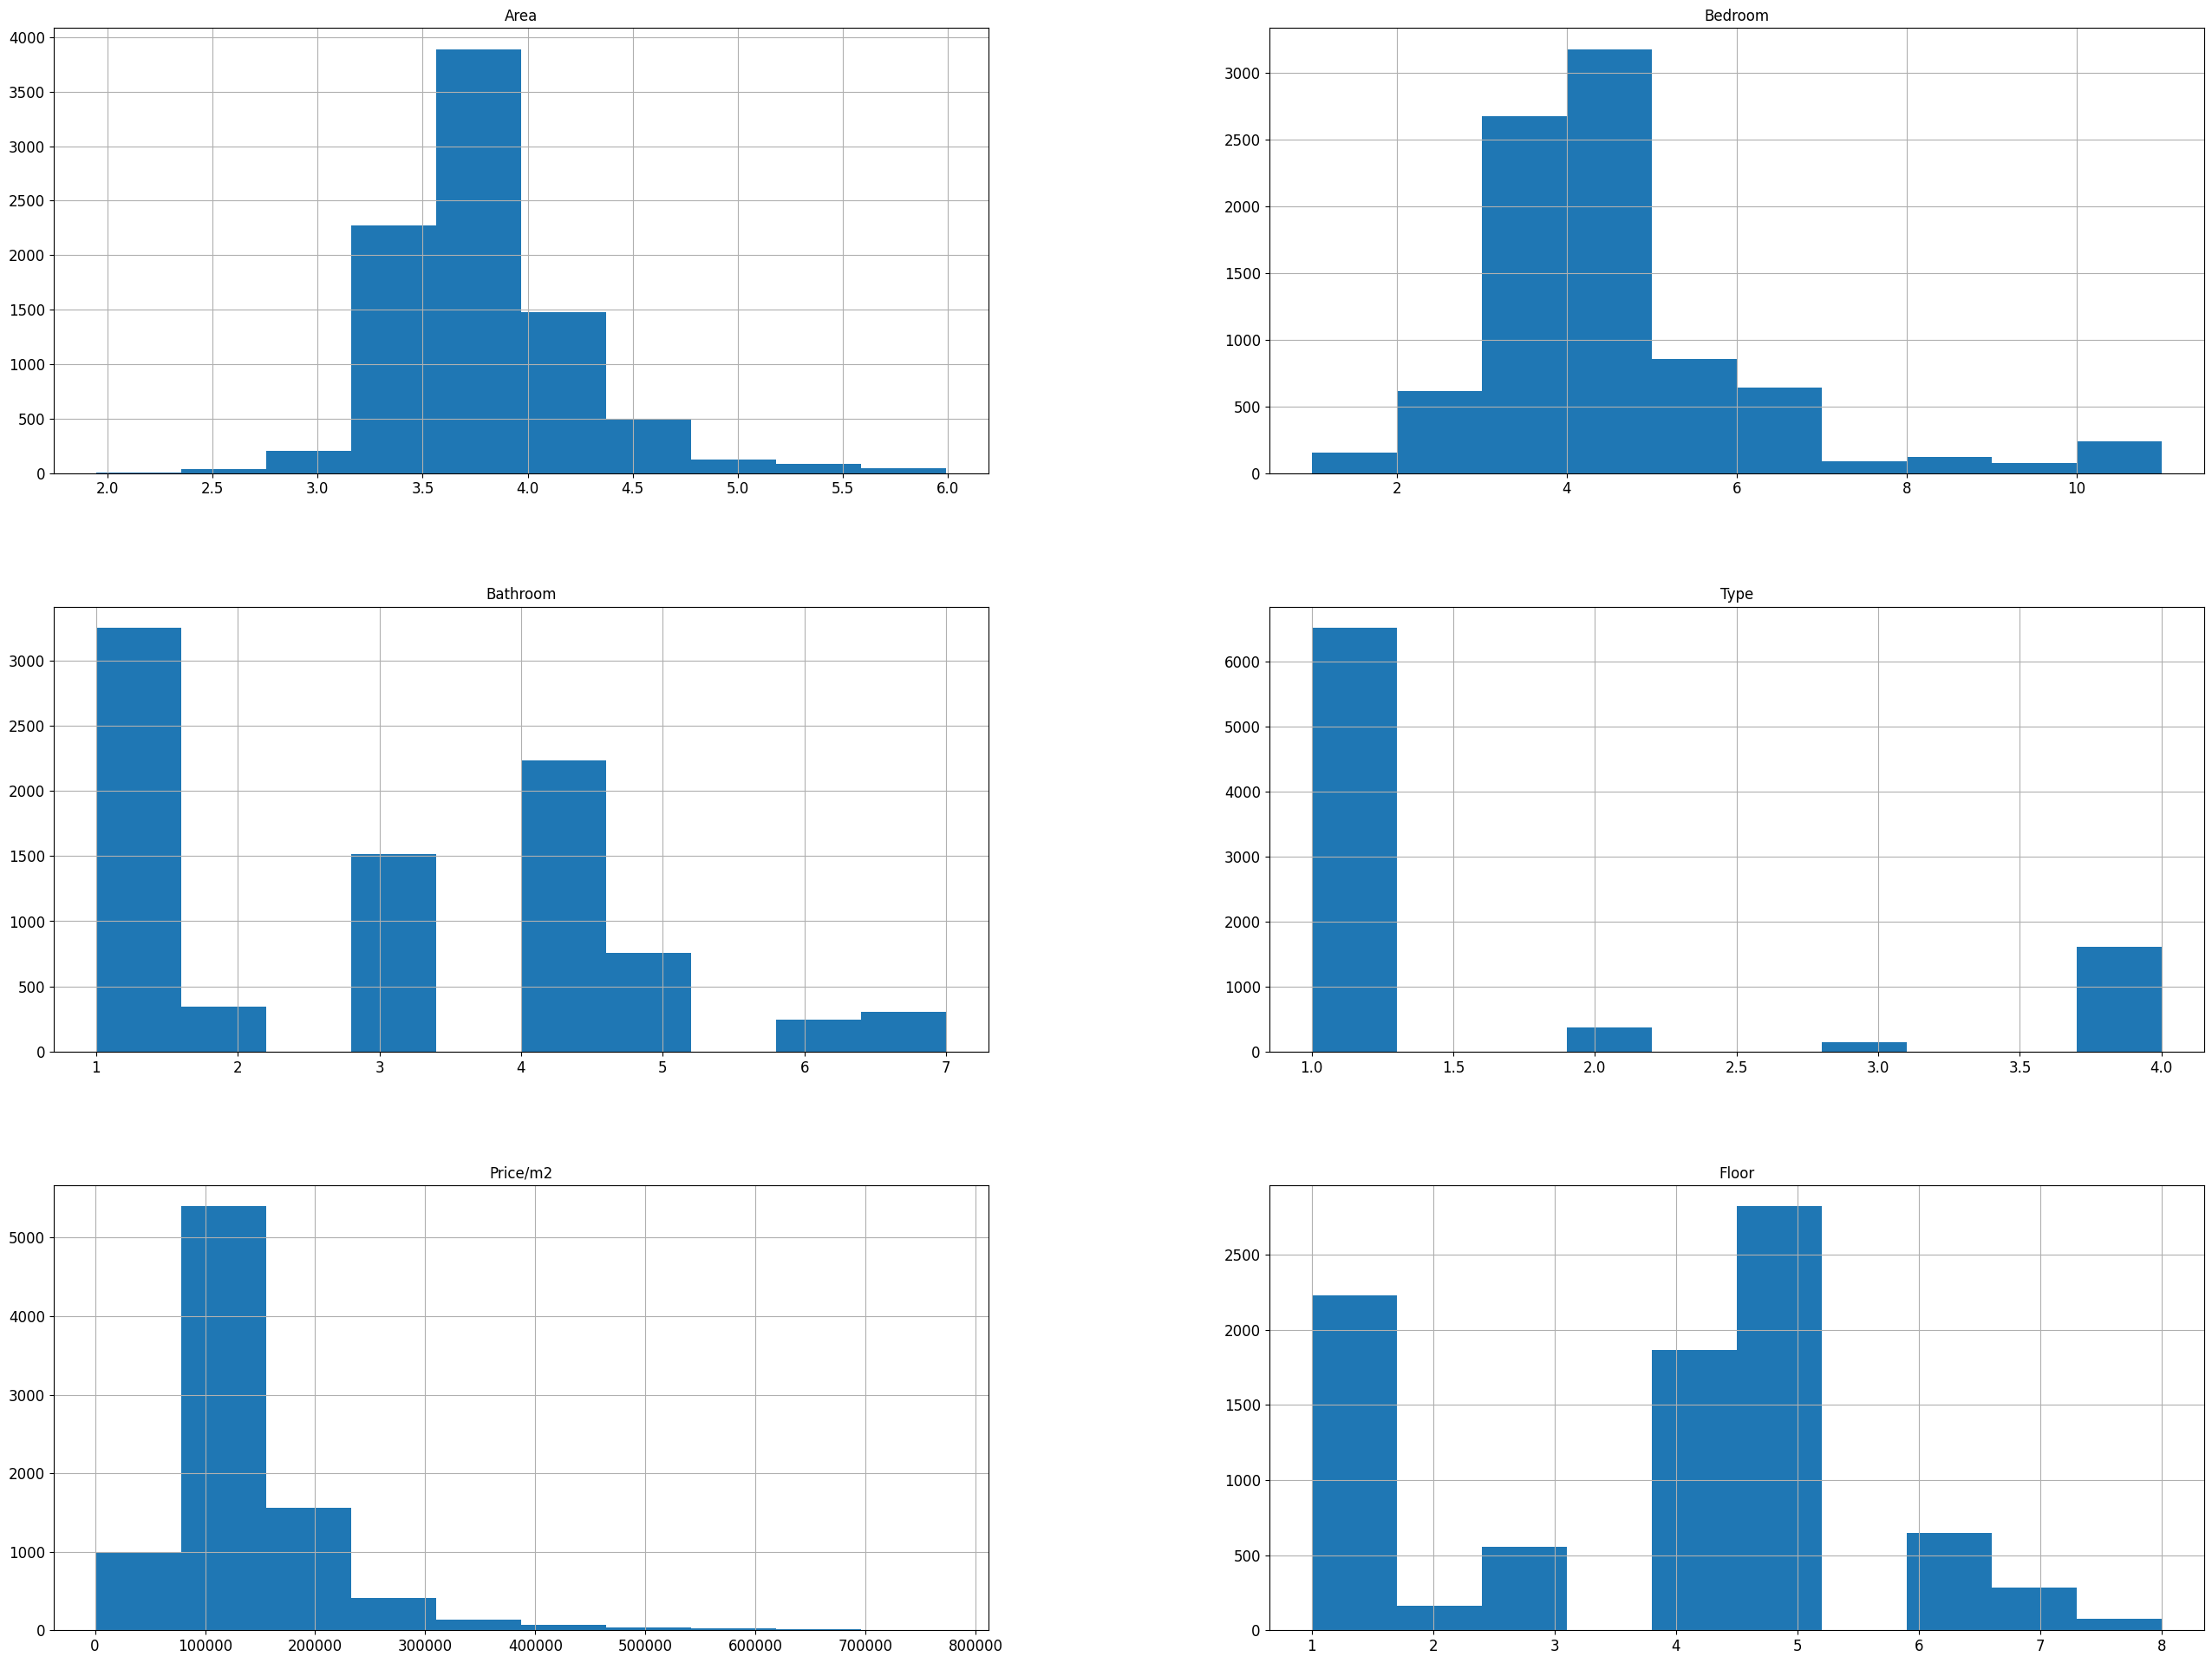

In [78]:
df_num = df.select_dtypes(include=["float64", "int64"])


df_num.hist(figsize=(32, 24), bins=12, xlabelsize=12, ylabelsize=12)

<Axes: >

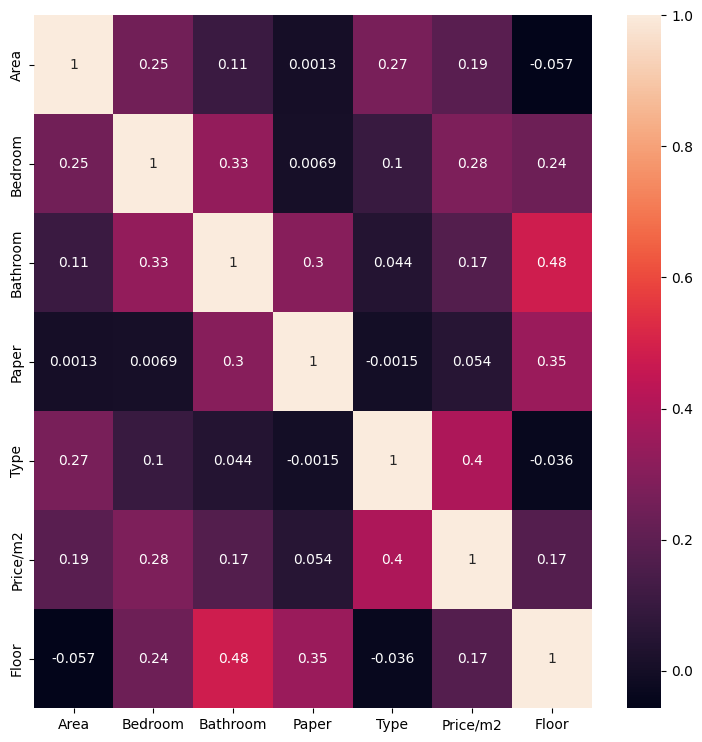

In [43]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(9, 9))
sns.heatmap(df_num.corr(), annot=True)



In [44]:
df.drop(
    columns=[
        "Paper",  # khong quan trong
    ],
    inplace=True,
)

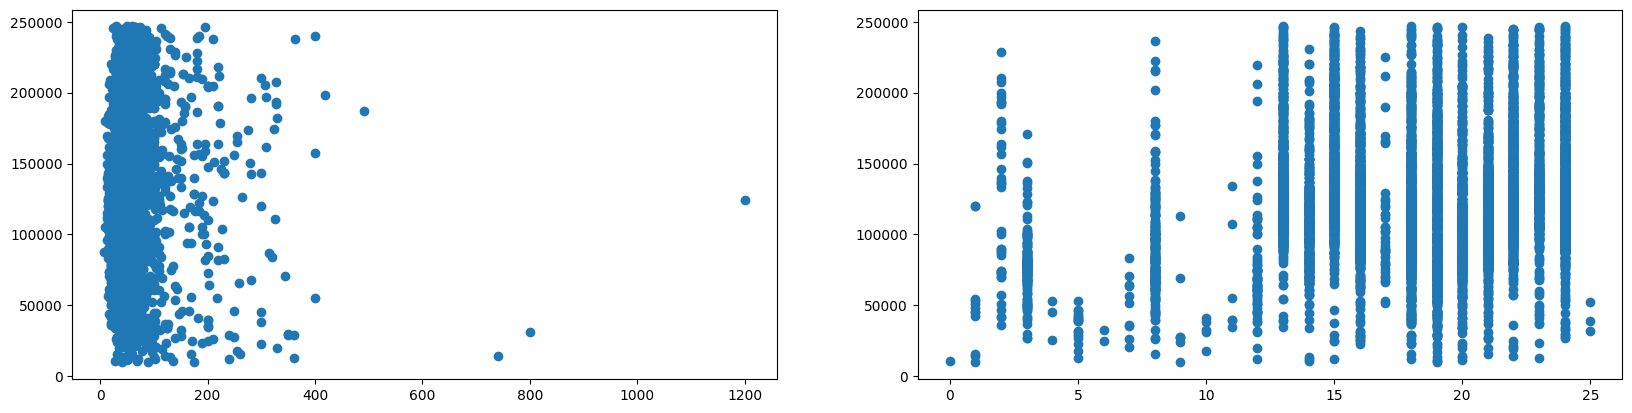

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(20, forward=True)

k = df.copy()

Q1 = df["Price/m2"].quantile(0.25)
Q3 = df["Price/m2"].quantile(0.75)
IQR = Q3 - Q1
k = k[(k["Price/m2"] > (Q1 - 1.5 * IQR)) & (k["Price/m2"] < (Q3 + 1.5 * IQR))]

ax1.scatter(y=k["Price/m2"], x=k["Area"])
ax2.scatter(y=k["Price/m2"], x=k["District"])

plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\2536851423.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price/m2"], color="g", hist_kws={"alpha": 0.4})


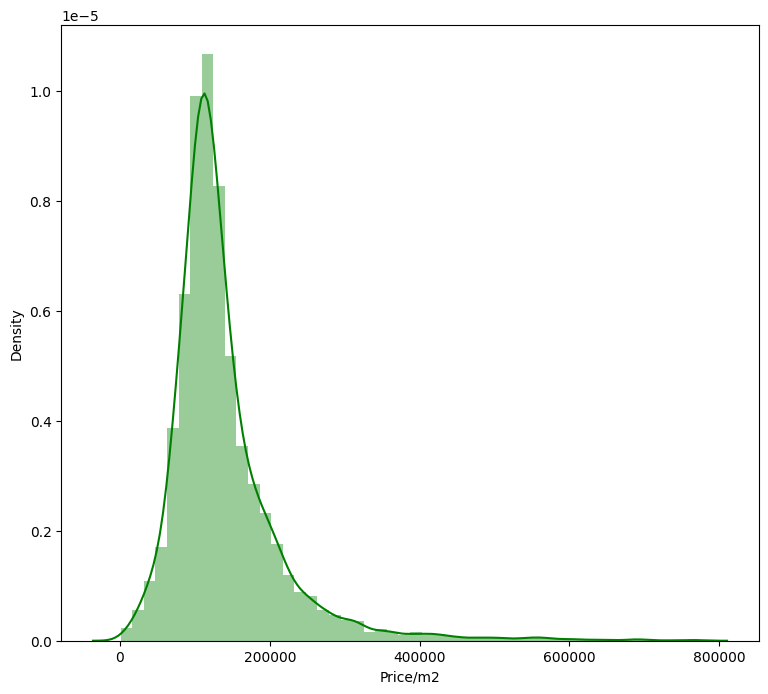

In [46]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Price/m2"], color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\1581070014.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp, color="g", hist_kws={"alpha": 0.4})


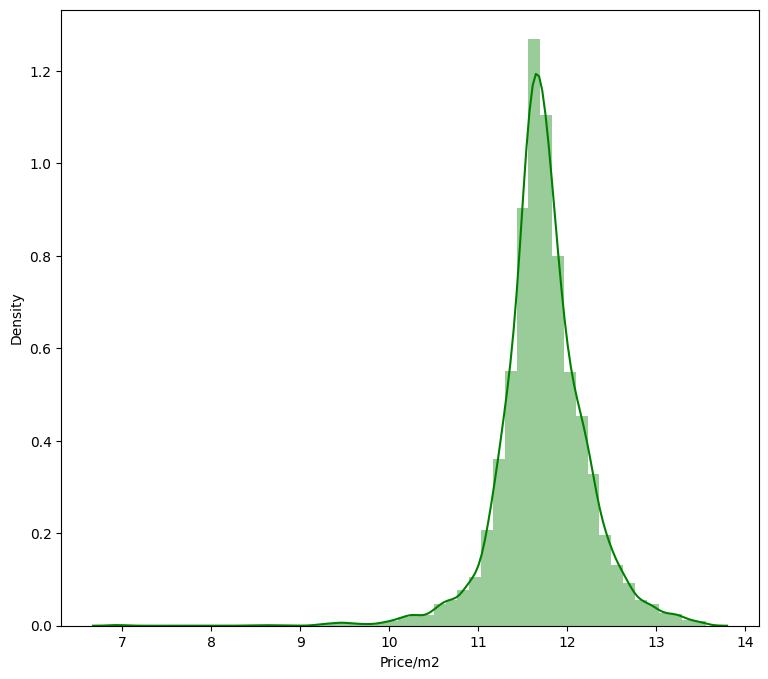

In [47]:
# convert lai phan gia ca
import math

temp = df["Price/m2"].apply(lambda x: math.log(x))


plt.figure(figsize=(9, 8))
sns.distplot(temp, color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\2360018363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Area"], color="g", hist_kws={"alpha": 0.4})


<Axes: xlabel='Area', ylabel='Density'>

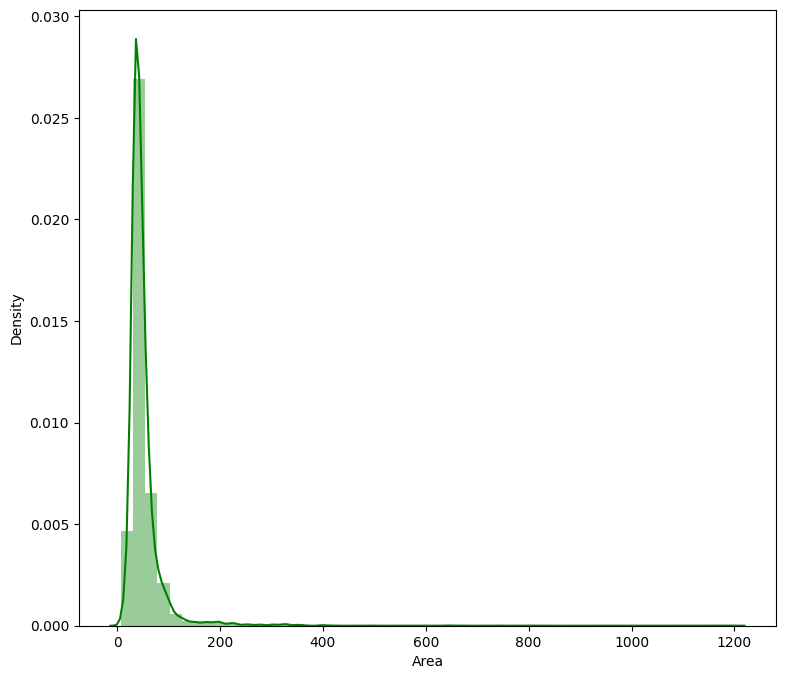

In [48]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Area"], color="g", hist_kws={"alpha": 0.4})

C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\1506067740.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_area, color="g", hist_kws={"alpha": 0.4})


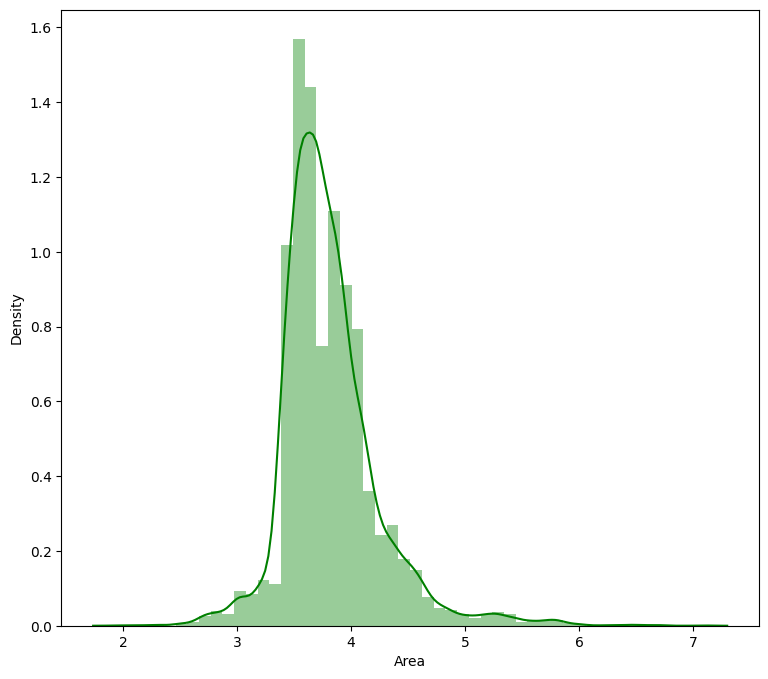

In [49]:
import math

temp_area = df["Area"].apply(lambda x: math.log(x))


plt.figure(figsize=(9, 8))
sns.distplot(temp_area, color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\18020573.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bedroom"], color="g", hist_kws={"alpha": 0.4})


<Axes: xlabel='Bedroom', ylabel='Density'>

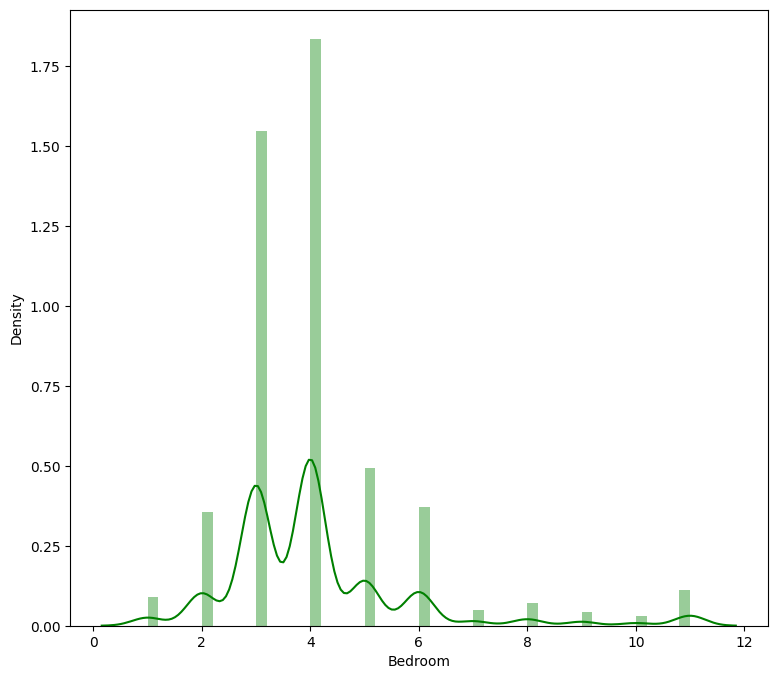

In [50]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Bedroom"], color="g", hist_kws={"alpha": 0.4})

In [51]:
df.dropna(subset=["Price/m2"], inplace=True)

In [52]:
df.isnull().sum()

Area        0
Bedroom     0
Bathroom    0
Type        0
Price/m2    0
Floor       0
District    0
dtype: int64

In [53]:

df["Area"] = df["Area"].apply(lambda x: math.log(x))
# df["Price/m2"] = df["Price/m2"].apply(lambda x: 10 ** (x))

<Axes: >

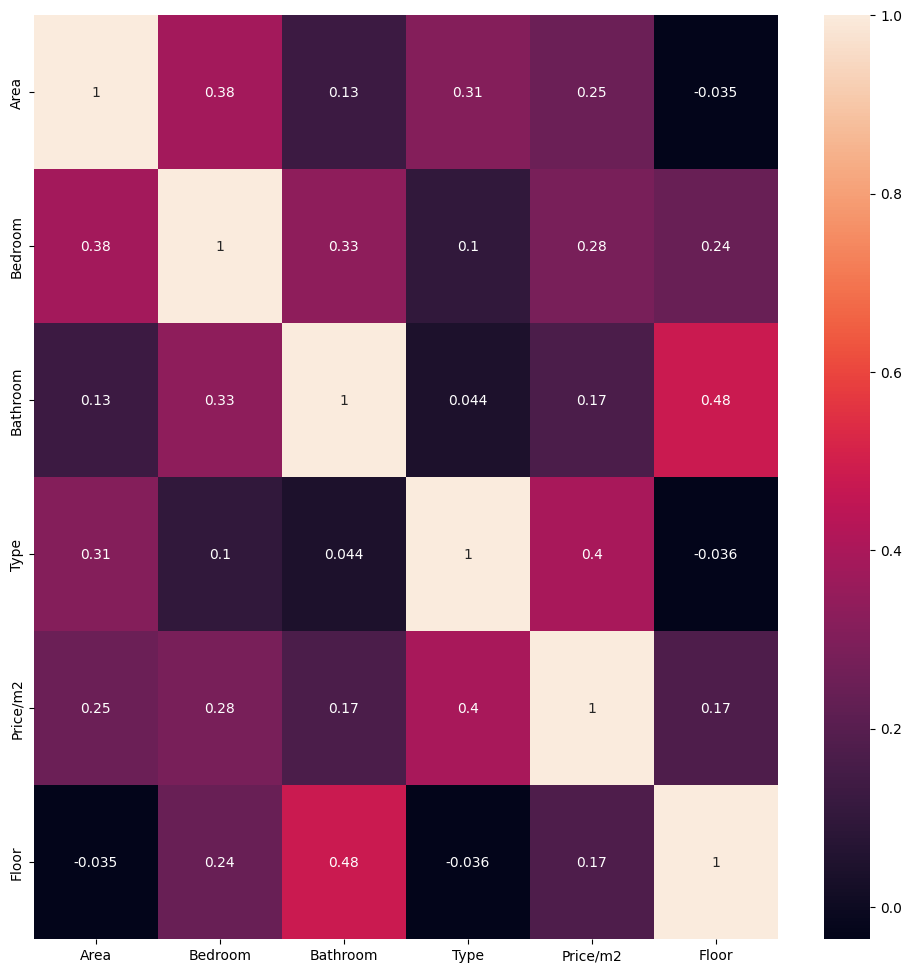

In [54]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(12, 12))
sns.heatmap(df_num.corr(), annot=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\653115914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Floor"], color="g", hist_kws={"alpha": 0.4})


<Axes: xlabel='Floor', ylabel='Density'>

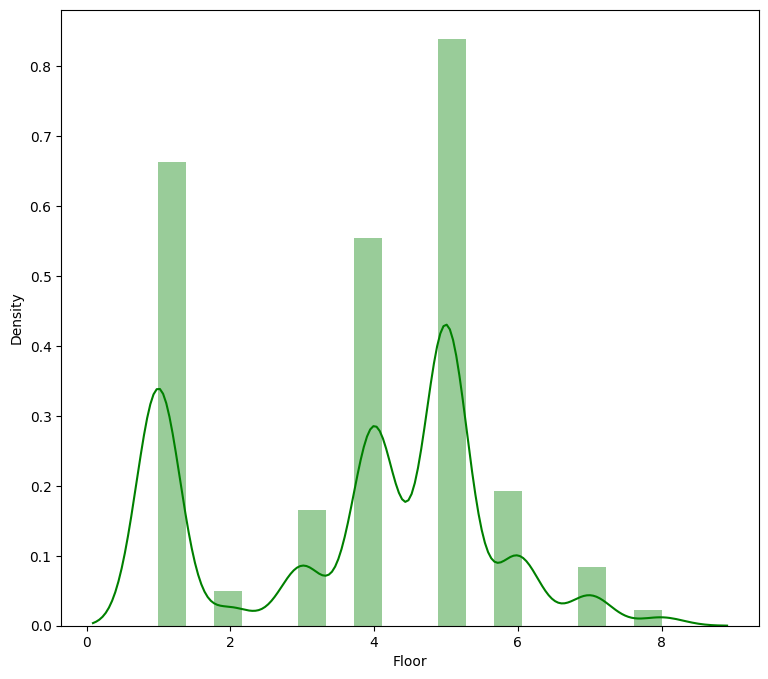

In [55]:
# df.dropna(subset=["Area"], inplace=True)df\
plt.figure(figsize=(9, 8))
sns.distplot(df["Floor"], color="g", hist_kws={"alpha": 0.4})

<Axes: >

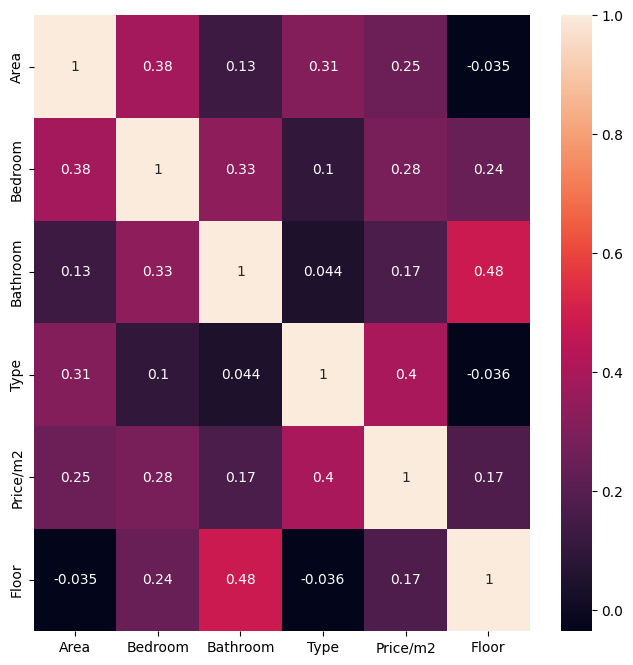

In [56]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(8, 8))
sns.heatmap(df_num.corr(), annot=True)

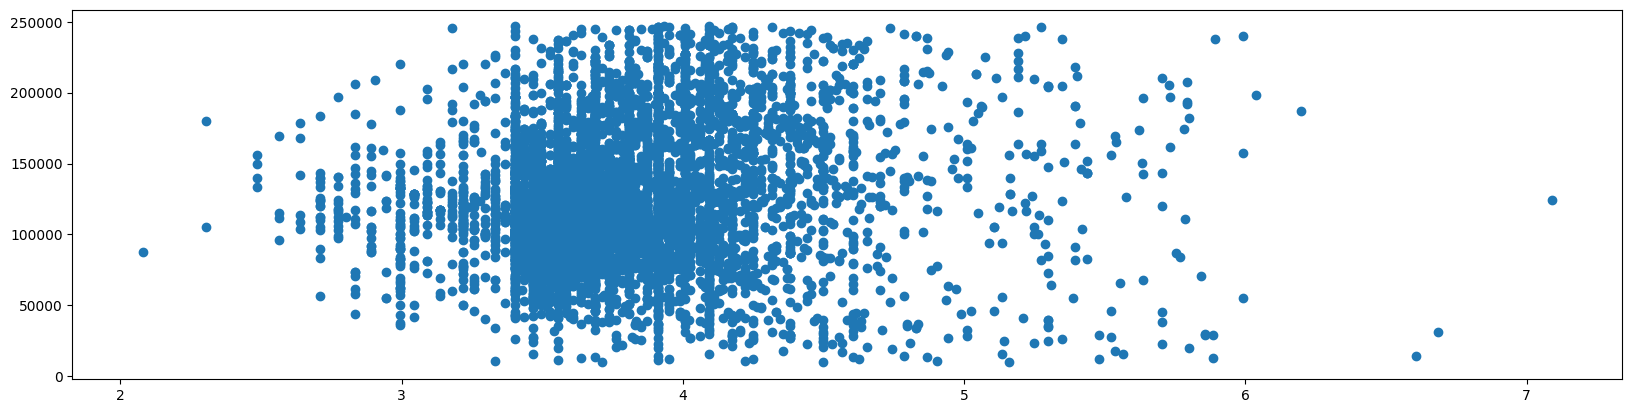

In [57]:
f, (ax1) = plt.subplots(1)
f.set_figwidth(20, forward=True)

k = df.copy()

Q1 = df["Price/m2"].quantile(0.25)
Q3 = df["Price/m2"].quantile(0.75)
IQR = Q3 - Q1
k = k[(k["Price/m2"] > (Q1 - 1.5 * IQR)) & (k["Price/m2"] < (Q3 + 1.5 * IQR))]

ax1.scatter(y=k["Price/m2"], x=k["Area"])

plt.show()

In [58]:
df = df[~(df["Area"]>6)]


<Axes: xlabel='Floor', ylabel='Price/m2'>

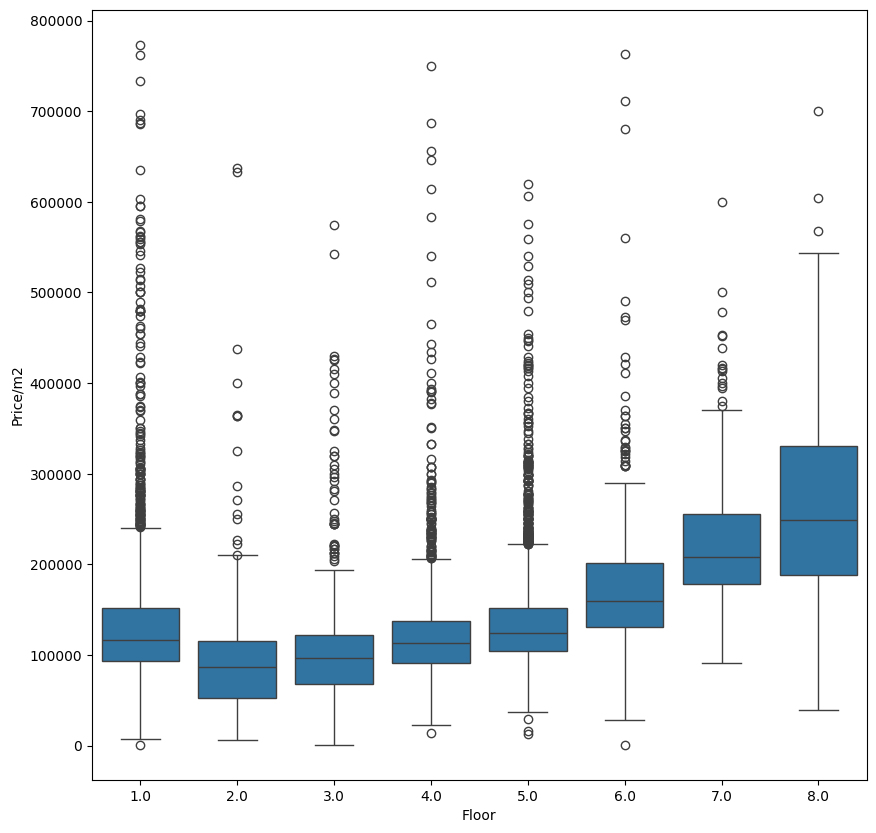

In [59]:
plt.figure(figsize=(10, 10))
k = df[["Price/m2", "Floor"]]



# k = k[(k['Price']> (Q1_Price-1.5*IQR_Price)) & (k['Price']<(Q3_Price+1.5*IQR_Price))]
sns.boxplot(data=k[["Price/m2", "Floor"]], x="Floor", y="Price/m2")

In [60]:
df_final = df[~df["Price/m2"].isna()]

In [61]:
# df_final.drop(columns=["Paper"], inplace=True)
df_final.drop(columns=["Floor"], inplace=True)
df_final

,Area,Bedroom,Bathroom,Type,Price/m2,District
0,4.007333,10.0,1.0,1.0,154550.0,15
1,3.637586,3.0,1.0,2.0,142110.0,19
2,3.737670,1.0,1.0,1.0,55950.0,20
3,4.174387,4.0,4.0,1.0,184620.0,15
4,3.583519,4.0,1.0,1.0,111110.0,14
...,...,...,...,...,...,...
9799,3.401197,3.0,1.0,1.0,120000.0,18
9800,4.189655,4.0,1.0,4.0,196970.0,16
9801,3.988984,2.0,1.0,1.0,80560.0,18
9802,4.430817,5.0,1.0,2.0,151190.0,3


In [62]:
# input features for model
X = df_final.drop(["Price/m2"], axis=1)
# output features for model
Y = df_final["Price/m2"]

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0
)

In [64]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
print("By using Linear Regression we got:")
print("Training data accuracy", lr_model.score(X_train, Y_train))
print("Testing data accuracy", lr_model.score(X_test, Y_test))

By using Linear Regression we got:
Training data accuracy 0.23743415926163514
Testing data accuracy 0.2396276977887951


In [65]:
from sklearn.ensemble import RandomForestRegressor

rfm = RandomForestRegressor()
rfm.fit(X_train, Y_train)

RandomForestRegressor()

In [66]:
print("By using Random Forest we got:")
print("Training data accuracy", rfm.score(X_train, Y_train))
print("Testing data accuracy", rfm.score(X_test, Y_test))

By using Random Forest we got:
Training data accuracy 0.8522851282076822
Testing data accuracy 0.3936198382445958


In [67]:
pred = rfm.predict(X_test)

In [68]:
X_train.shape

(6916, 5)

In [69]:
# from sklearn.metrics import mean_absolute_error
# from sklearn import metrics

# print(mean_absolute_error(Y_test, pred))
# print(metrics.mean_absolute_error(Y_test, pred))